# 30 Day Map Challenge

## Day 13 - Chloropleth

Plan:

Setting up the notebook

In [1]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
px.defaults.width = 1300
px.defaults.height = 800

In [2]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\2023 data\\Day 13")

In [3]:
Countries = gpd.read_file("world-administrative-boundaries.shp")
Countries.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15..."
4,None,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."


In [4]:
Countries[Countries.values == "USA"]

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
69,VIR,US Non-Self-Governing Territory,USA,United States Virgin Islands,Americas,Caribbean,VI,United States Virgin Islands,"MULTIPOLYGON (((-64.76418 17.77861, -64.75598 ..."
95,None,US Territory,USA,Guantanamo,Americas,Caribbean,None,Guantanamo,"MULTIPOLYGON (((-75.22373 19.90155, -75.22696 ..."
122,PRI,US Territory,USA,Puerto Rico,Americas,Caribbean,PR,Puerto Rico,"MULTIPOLYGON (((-65.44139 18.09028, -65.52501 ..."
147,None,US Territory,USA,Midway Is.,Americas,Northern America,None,Midway Is.,"POLYGON ((-177.38806 28.18638, -177.39334 28.1..."
173,MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ..."
211,None,US Territory,USA,Jarvis Island,Americas,Northern America,None,Jarvis Island,"POLYGON ((-160.02114 -0.39806, -160.02811 -0.3..."
222,USA,Member State,USA,United States of America,Americas,Northern America,US,États-Unis d'Amérique,"MULTIPOLYGON (((-155.00558 19.32888, -155.1453..."
222,USA,Member State,USA,United States of America,Americas,Northern America,US,États-Unis d'Amérique,"MULTIPOLYGON (((-155.00558 19.32888, -155.1453..."


In [5]:
Countries = Countries.rename({'name': 'Country'}, axis = 'columns')

In [6]:
Countries = Countries[['Country','geometry']]
Countries

,Country,geometry
0,Uganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,Uzbekistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,Ireland,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,Eritrea,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15..."
4,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."
...,...,...
251,Slovakia,"POLYGON ((22.55805 49.07944, 22.55166 49.03943..."
252,Mali,"POLYGON ((-4.80611 25.00027, -4.52528 24.82500..."
253,Armenia,"POLYGON ((46.54038 38.87559, 46.51639 38.87804..."
254,Albania,"POLYGON ((20.07142 42.56091, 20.10208 42.53347..."


In [7]:
Tswift = pd.read_csv("Taylor Sales.csv")
Tswift.head()

,Country,Sales,Albums counted
0,Australia,"2,135,000",9
1,Austria,"70,000",3
2,Belgium,"285,000",7
3,Brazil,"80,000",3
4,Canada,"2,479,000",12


In [8]:
TSData = Countries.merge(Tswift, #map_df merge to df
 left_on=['Country'], 
 right_on=['Country'])
TSData

,Country,geometry,Sales,Albums counted
0,Ireland,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...","52,500",3
1,Spain,"MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ...","60,000",3
2,Switzerland,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ...","10,000",1
3,Austria,"POLYGON ((16.94618 48.61907, 16.94333 48.57333...","70,000",3
4,Canada,"MULTIPOLYGON (((-66.87528 44.61944, -66.88612 ...","2,479,000",12
5,Poland,"POLYGON ((19.62726 54.46327, 19.65111 54.45583...","50,000",2
6,Italy,"MULTIPOLYGON (((15.52889 38.13694, 15.50361 38...","150,000",5
7,Australia,"MULTIPOLYGON (((158.88217 -54.71139, 158.87966...","2,135,000",9
8,Republic of Korea,"MULTIPOLYGON (((126.62221 33.23999, 126.59943 ...","25,006",4
9,Germany,"MULTIPOLYGON (((14.22555 53.92860, 14.21583 53...","600,000",5


(-196.1161849999999,
 197.67556499999998,
 -61.647278499999956,
 90.00726850000005)

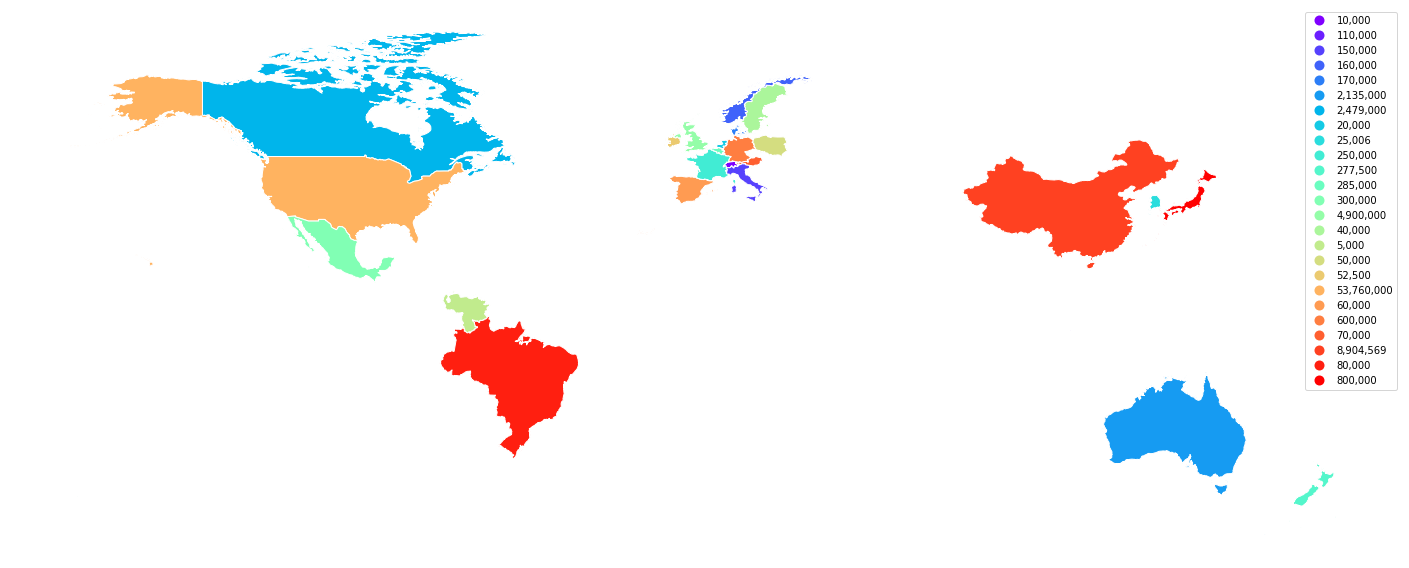

In [9]:
fig, ax = plt.subplots(1, figsize=(25,15))
TSData.plot(column="Sales", 
              cmap="rainbow", 
              linewidth=1, 
              ax=ax,
            edgecolor='1', 
            legend = True)
ax.axis('off')

In [10]:
px.set_mapbox_access_token(open('mapboxtoken.txt').read())

In [12]:
fig = px.choropleth_mapbox(TSData, locations = TSData.index, geojson = TSData.geometry, color = "Sales", 
                            color_continuous_scale="Viridis", center={"lat":0, "lon":0}, 
                            zoom = 1, opacity = 0.6)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, mapbox_style="mapbox://styles/mapbox/dark-v10", paper_bgcolor = '#191A1A')
fig.update_coloraxes(colorbar_bgcolor='#191A1A', colorbar_xpad=10, colorbar_tickfont_color='#3D4C89',
                        colorbar_title_font_color='#3D4C89', cmin=0)
fig.show()